# Webscraping and Natural Language Processing

In [1]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/q7AM9QjCRrI" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

### Investigating texts from Project Gutenberg

![](images/gutenberg.png)

### List Review

In [4]:
a = ['Uncle', 'Stever', 'has', 'a', 'gun']

In [5]:
a

['Uncle', 'Stever', 'has', 'a', 'gun']

In [6]:
a[0]

'Uncle'

In [7]:
b = [i.lower() for i in a]

In [8]:
b

['uncle', 'stever', 'has', 'a', 'gun']

### Scraping the Text

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [10]:
url = "http://www.gutenberg.org/files/15784/15784-0.txt"

In [11]:
response = requests.get(url)

In [12]:
type(response)

requests.models.Response

In [13]:
response

<Response [200]>

In [14]:
soup_dos = BeautifulSoup(response.content, "html.parser")

In [15]:
len(soup_dos)

1

In [16]:
dos_text = soup_dos.get_text()

In [17]:
type(dos_text)

str

In [18]:
len(dos_text)

550924

In [20]:
print(dos_text[:1000])

The Project Gutenberg EBook of The Chronology of Ancient Kingdoms Amended
by Isaac Newton

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: The Chronology of Ancient Kingdoms Amended
       To which is Prefix'd, A Short Chronicle from the First
       Memory of Things in Europe, to the Conquest of Persia by
       Alexander the Great

Author: Isaac Newton

Release Date: May 7, 2005 [EBook #15784]

Language: English

Character set encoding: Unicode UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK THE CHRONOLOGY OF ANCIENT ***




Produced by Robert Shimmin, Keith Edkins and the Online
Distributed Proofreading Team.




THE
CHRONOLOGY
OF
ANCIENT KINGDOMS
AMENDED.

To which is Prefix'd,
_A _SHORT CHRONICLE_ from the First
Memory of Things in _


### Using Regular Expressions

![](https://imgs.xkcd.com/comics/regular_expressions.png)

Regular expressions are a way to parse text using symbols to represent different kinds of textual characters.  For example, in the above sentence, notice that we have some symbols that are only there to impart formatting.  If we want to remove these, and only have the textual pieces, we can use a regular expression to find only words. 

In [21]:
import re

In [22]:
a = 'Who knew Johnny Depp was an undercover police officer (with Richard Greico)!'

**regular expression**
* `\w` means letter
* `\w+` means word
* `d\w+` means words following the letter `d`

In [20]:
ds = 'd\w+'

In [21]:
re.findall(ds, a)

['dercover']

In [23]:
re.findall('d\w', a)

['de']

In [24]:
ds = 'D\w+'

In [25]:
re.findall(ds, a)

['Depp']

In [26]:
ds = '[dD]\w+'

In [27]:
re.findall(ds, a)

['Depp', 'dercover']

In [28]:
# find only words
words = re.findall('\w+', dos_text)

In [29]:
words[:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'Chronology',
 'of',
 'Ancient',
 'Kingdoms']

### Tokenization

Turning the document into a collection of individual items -- words.

**regular expression**
* `a-z` means all lowercase letters
* `A-Z` means all uppercase letters
* `[a-zA-Z]` means all upper and lowercase letters
* `[^]` excludes anything that comes after the `^`

In [30]:
from nltk.tokenize import RegexpTokenizer

In [31]:
tokenizer = RegexpTokenizer('[a-zA-Z]\w+[^\_\\r\\n__.:\-\"" ]')

In [32]:
tokens = tokenizer.tokenize(dos_text)

In [33]:
tokens[:8]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'The',
 'Chronology',
 'Ancient',
 'Kingdoms']

In [34]:
words = []
for word in tokens:
    words.append(word.lower())

In [35]:
words[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'chronology',
 'ancient',
 'kingdoms',
 'amended',
 'isaac']

### Stopwords

In [36]:
# stopwords are the unnecessary words in the english language
from nltk.corpus import stopwords

In [38]:
## other way to import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karenhao/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
stop_words = set(stopwords.words('english'))

In [40]:
wordin = [w for w in words if w not in stop_words]
print(wordin[:100])

['project', 'gutenberg', 'ebook', 'chronology', 'ancient', 'kingdoms', 'amended', 'isaac', 'newton', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'it,', 'give', 'away', 'use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'net', 'title', 'chronology', 'ancient', 'kingdoms', 'amended', "prefix'", 'short', 'chronicle', 'first', 'memory', 'things', 'europe,', 'conquest', 'persia', 'alexander', 'great', 'author', 'isaac', 'newton', 'release', 'date', 'may', 'ebook', 'language', 'english', 'character', 'set', 'encoding', 'unicode', 'utf', 'start', 'project', 'gutenberg', 'ebook', 'chronology', 'ancient', 'produced', 'robert', 'shimmin,', 'keith', 'edkins', 'online', 'distributed', 'proofreading', 'team', 'chronology', 'ancient', 'kingdoms', 'amended', "prefix'", 'short', 'chronicle', 'first', 'memory', 'things', 'europe_,', 'conquest', 'persia', 'alexander', 'great', 'sir', 'isaac', 'new

### Analyzing the Text with NLTK

The Natural Language Toolkit is a popular Python library for text analysis.  We will use it to split the text into individual words(tokens), and create a plot of the frequency distribution of the tokens.  

In [41]:
# turns words into object that can have nltk operations performed on them
text = nltk.Text(wordin)

In [42]:
type(text[0])

str

In [42]:
text[:10]

['project',
 'gutenberg',
 'ebook',
 'chronology',
 'ancient',
 'kingdoms',
 'amended',
 'isaac',
 'newton',
 'ebook']

In [43]:
fdist = nltk.FreqDist(text)

In [44]:
type(fdist)

nltk.probability.FreqDist

In [45]:
fdist.most_common(10)

[('years', 413),
 ('year', 346),
 ('king', 340),
 ('son', 311),
 ('first', 263),
 ('reign', 249),
 ('one', 234),
 ('kings', 224),
 ('egypt', 222),
 ('called', 219)]

In [46]:
fdist['blood']

2

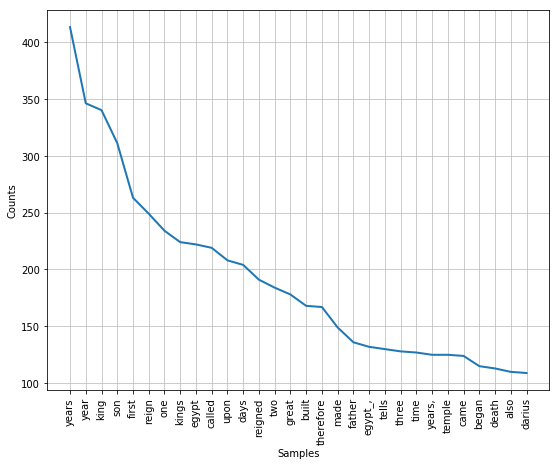

In [47]:
plt.figure(figsize = (9, 7))
fdist.plot(30)

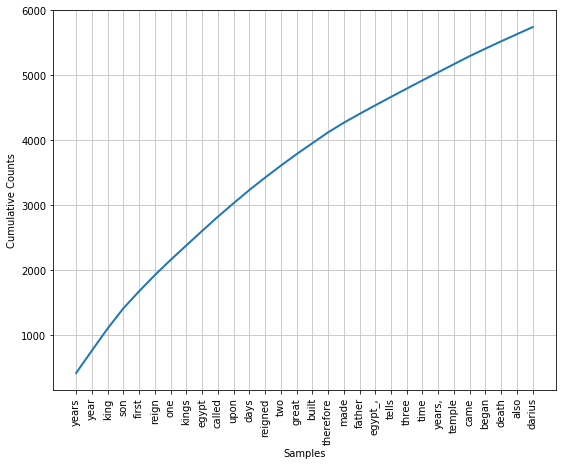

In [48]:
plt.figure(figsize = (9, 7))
fdist.plot(30, cumulative=True)

### Part of Speech Tagging

In [49]:
# get parts of speech
tagged = nltk.pos_tag(text)
#nltk.download('averaged_perceptron_tagger')

In [50]:
tagged[:10]

[('project', 'NN'),
 ('gutenberg', 'NN'),
 ('ebook', 'NN'),
 ('chronology', 'NN'),
 ('ancient', 'NN'),
 ('kingdoms', 'NNS'),
 ('amended', 'VBD'),
 ('isaac', 'JJ'),
 ('newton', 'NN'),
 ('ebook', 'NN')]

In [51]:
text.similar("king")

one kings reigns great raise subject time together empire egypt
solomon therefore also saith tells names priests days reigned trojan


In [52]:
text.common_contexts(["king", "brother"])

No common contexts were found


In [53]:
text.common_contexts(["king", "reigns"])

ammon_egypt tirhakah_ethiopia


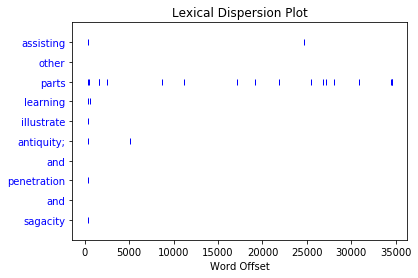

In [54]:
text.dispersion_plot(words[500:510])

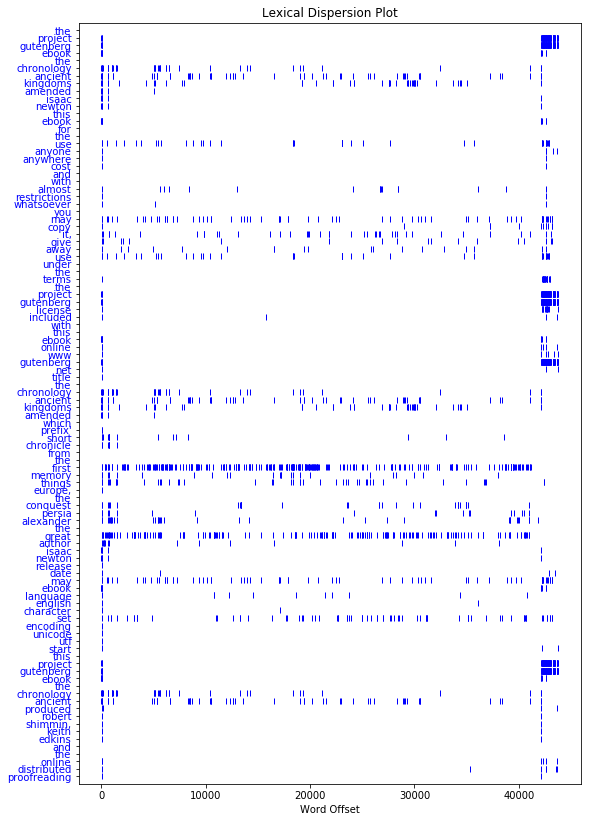

In [59]:
plt.figure(figsize = (9, 14))
text.dispersion_plot(words[:100])

### Lexical Richness of Text

In [54]:
len(text)

43749

In [55]:
len(set(text))/len(text)

0.22363939747194223

In [56]:
text.count("kings")

224

In [57]:
100*text.count("kings")/len(text)

0.5120117031246428

### Long Words, Bigrams, Collacations

In [58]:
long_words = [w for w in words if len(w)>10]

In [59]:
long_words[:10]

['restrictions',
 'distributed',
 'proofreading',
 'encouragement',
 'extraordinary',
 'productions',
 'protection;',
 'chronicle_,',
 'demonstration',
 'judiciousness']

In [60]:
list(nltk.bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [61]:
text.collocations()

project gutenberg; tells us,; anno nabonass; argonautic expedition;
hundred years; years death; year nabonassar; years piece; return
heraclides; literary archive; red sea_,; saith he,; red sea; one
another,; gutenberg electronic; alexander great; assyrian empire;
argonautic expedition,; trojan war,; gutenberg literary


In [ ]:
df = pd.read_csv('data/jumpstreet.csv', index_col = 0)

In [ ]:
df.head()

### Task

1. Scrape and tokenize a text from project Gutenberg.

2. Compare the most frequent occurring words with and without stopwords removed.

3. Examine the top bigrams.  Create a barplot of the top 10 bigrams.

4. Create a topic model using our `scikitlearn` pipeline from last class.  Visualize and discuss in terms of the book.



**Further Reading**:  http://www.nltk.org/book/

In [ ]:
def gut_scraper(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    tt = soup.get_text()
    words = re.findall('\w+', dos_text)
    tokens = tokenizer.tokenize(dos_text)
    wrds = []
    for word in tokens:
        wrds.append(word.lower)
    fdist = nltk.FreqDist(wrds)
    plt.figure(figsize = (9, 7))
    fdist.plot(30)

In [ ]:
gut_scraper('http://www.gutenberg.org/cache/epub/35688/pg35688.txt')